In [1]:
#sentimental analysis on  twitter text data thats show the user text is positive or negative

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import nltk
import re
import string
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading Data

In [11]:
df=pd.read_csv('twitter_text.csv')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## Preprocessing Data

In [13]:
# first we neet to delete user handal name from tweet
# remove pattern in the input user
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for word in r:
        input_txt =re.sub(word,"",input_txt)
    return input_txt

In [14]:
#remove twitter handal now(@user)
df['clean_tweet']=np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")

In [15]:
df

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso..."


In [17]:
# noe remove special characters ,numbers and punchuation
df['clean_tweet']=df['clean_tweet'].str.replace("{^a=zA=Z#}"," ")

In [18]:
df

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso..."


In [20]:
#remove short words
df['clean_tweet']=df['clean_tweet'].apply(lambda x:" ".join([w for w in x.split() if len(w)>3]))

In [21]:
df

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,that youuu?ððððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,nina turner airwaves trying wrap herself mantl...
31959,31960,0,listening to sad songs on a monday morning otw...,listening songs monday morning work
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised #calgary, #wso condemns"


In [24]:
#individual words consider as tokens 
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())

In [26]:
tokenized_tweet

0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, #lyft, credit, can't, cause, they, do...
2                                  [bihday, your, majesty]
3        [#model, love, take, with, time, urð±!!!, ð...
4                      [factsguide:, society, #motivation]
                               ...                        
31957    [that, youuu?ððððððððð...
31958    [nina, turner, airwaves, trying, wrap, herself...
31959            [listening, songs, monday, morning, work]
31960    [#sikh, #temple, vandalised, #calgary,, #wso, ...
31961                                      [thank, follow]
Name: clean_tweet, Length: 31962, dtype: object

In [27]:
## steam the words

from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

tokenized_tweet=tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

In [28]:
tokenized_tweet

0        [when, father, dysfunct, selfish, drag, kid, i...
1        [thank, #lyft, credit, can't, caus, they, don'...
2                                  [bihday, your, majesti]
3        [#model, love, take, with, time, urð±!!!, ð...
4                           [factsguide:, societi, #motiv]
                               ...                        
31957    [that, youuu?ððððððððð...
31958    [nina, turner, airwav, tri, wrap, herself, man...
31959                   [listen, song, monday, morn, work]
31960    [#sikh, #templ, vandalis, #calgary,, #wso, con...
31961                                      [thank, follow]
Name: clean_tweet, Length: 31962, dtype: object

In [30]:
#combine into single string
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join(tokenized_tweet[i])
    
df['clean_tweet']=tokenized_tweet

In [31]:
df

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,that youuu?ððððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,nina turner airwav tri wrap herself mantl genu...
31959,31960,0,listening to sad songs on a monday morning otw...,listen song monday morn work
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #templ vandalis #calgary, #wso condemn"


# EDA

In [32]:
#visualize a frequent words use 
all_word=" ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500, random_state=42,max_font_size=100).generate(all_word)

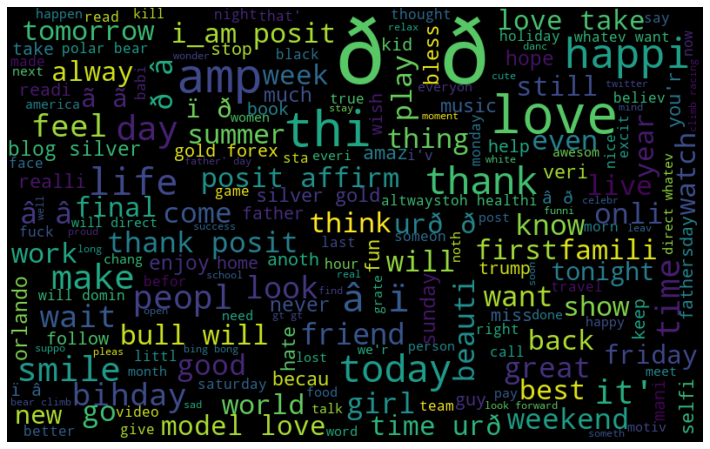

In [35]:
#plot the graph 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

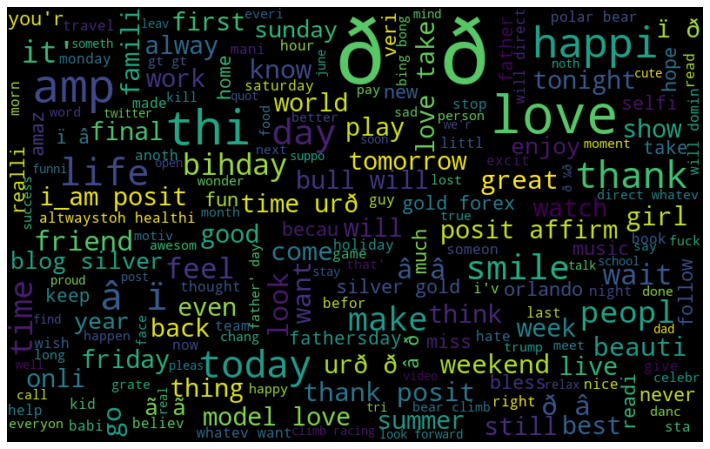

In [36]:
#freqent word visualiztion for postive 
all_word=" ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])
wordcloud=WordCloud(width=800,height=500, random_state=42,max_font_size=100).generate(all_word)
#plot the graph 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

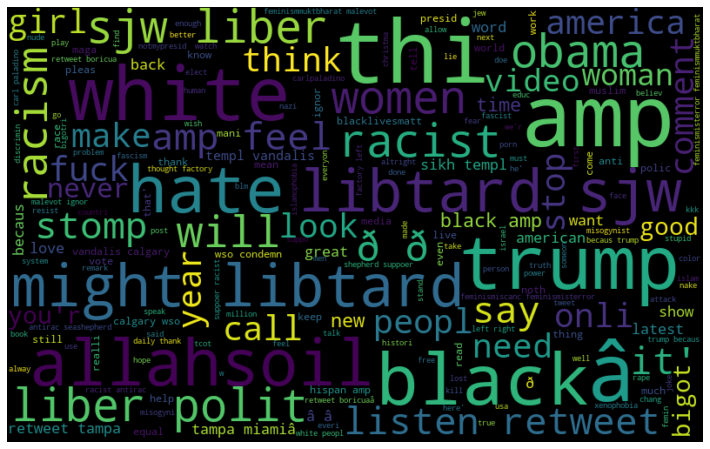

In [37]:
#freqent word visualiztion for -ve
all_word=" ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])
wordcloud=WordCloud(width=800,height=500, random_state=42,max_font_size=100).generate(all_word)
#plot the graph 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
# extract the hastag 
def hashtag_extract(tweet):
    hashtags=[]
    #loop word in tweet
    for tweet in tweet:
        ht=re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags   

In [40]:
ht_positive=hashtag_extract(df['clean_tweet'][df['label']==0])
ht_negative=hashtag_extract(df['clean_tweet'][df['label']==1])

In [41]:
ht_positive

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['gr8'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['80day', 'gettingf'],
 ['got7', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro2016'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica16'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift1989'],
 ['traveling

In [42]:
# now make a single list of positive word and negative word
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])

In [43]:
ht_positive

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'gr8',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 '80day',
 'gettingf',
 'got7',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro2016',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica16',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift1989',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop'

In [47]:
# use dictorny from nltk to process that  tweets
freq=nltk.FreqDist(ht_positive)
d=pd.DataFrame({'Hashtag':list(freq.keys()),
               'count': list(freq.values())})
d.head()

,Hashtag,count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


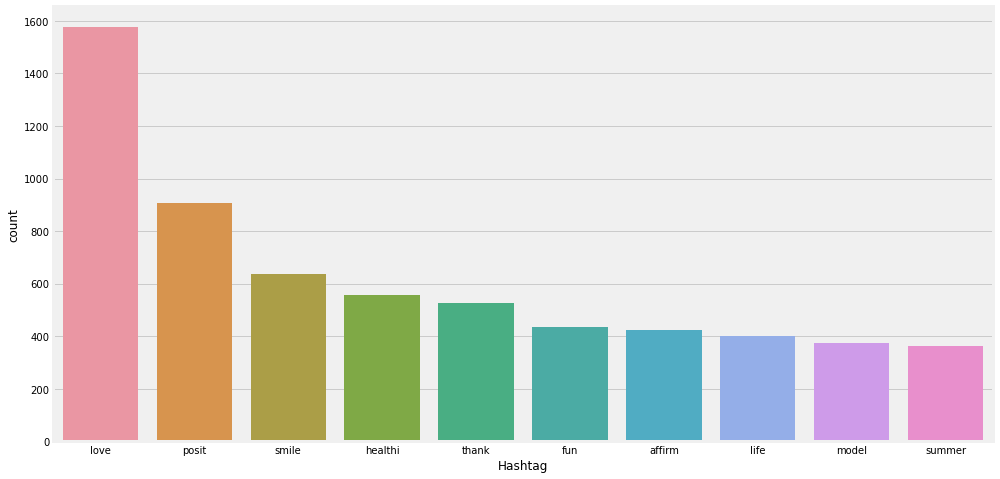

In [51]:
#select top 10 hashtags
import seaborn as sns
d=d.nlargest(columns='count',n=10)
plt.figure(figsize=(15,8))
sns.barplot(data=d,x="Hashtag",y="count")
plt.show()

In [52]:
 # also do for negative word
freq=nltk.FreqDist(ht_positive)
n=pd.DataFrame({'Hashtag':list(freq.keys()),
               'count': list(freq.values())})
n.head()  

,Hashtag,count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


In [ ]:
# #select top 10 hashtags

# d=d.nlargest(columns='count',n=10)
# plt.figure(figsize=(15,8))
# sns.barplot(data=n,x="Hashtag",y="count")
# plt.show()

In [58]:
## Feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(df['clean_tweet'])

In [59]:
bow

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 123382 stored elements in Compressed Sparse Row format>

In [61]:
#split the import 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow,df['label'],random_state=42,test_size=0.25)

## Model Training

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score,classification_report

In [62]:
# train
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
# test

pred=model.predict(x_test)
f1_score(y_test,pred)

0.5083135391923991

In [65]:
accuracy_score(y_test,pred)

0.9481917156801402

In [69]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7432
           1       0.76      0.38      0.51       559

    accuracy                           0.95      7991
   macro avg       0.86      0.69      0.74      7991
weighted avg       0.94      0.95      0.94      7991

